# Introduction

Healthcare industry is one of the biggest industries over the globe. Everyday there are enthusiastic individuals are working to make healthcare better. Our objective should be in the same direction  to make earth a better place.
My objective is to analyze the a hospital data for the appointments made over a period of time in year 2016
The chosen data is from a particular hospital in Brazil which contains all the appointments made by the people from May-June 2016. An AppointmentId is generated with all the details of the patient like age, gender, recieved SMS or not and more variables.We'll attempt to mine insights and produce a predictive model that can be used as the first step to solve the problem. Analyzing what can be reason behind the No-show for appointments by the people. 


# Dataset

This dataset id obtained from kaggle with 100k observations and 14 variables. https://www.kaggle.com/joniarroba/noshowappointments
Dataset has different types of features
1. Appointment Id - unique,
2. Patient Id- unique,
3. Date - Appointment - datetime,
4. Date - Scheduled - datetime,
5. Age - numerical, 
6. Gender - categorical,
7. Alchololic - categorical,
8. Hypertension - categorical,
9. Diabetes - categorical,
10. Handicap - ordinal,
11. SMS recieved - categorical,
12. Neighbourhood - ordinal,
13. Scholarship - categorical,
14. No-show - target,

# Project Definition

With this hospital appointment data, analyzing whether the people who made the appointment will no show.

# Data Exploration

Steps to follow for data exploration 

1) load dataset into a dataframe (df)

2) Defining an OUTPUT_LABEL

3) Calculating the prevalence of the positive class

In [1]:
# import pandas library 
import pandas as pd
df = pd.read_csv('../input/no-show-appointment/data.csv')

In [2]:
print('Number of samples:', len(df))

Number of samples: 110527


In [3]:
# exploring data
list(df. columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Create a column called OUTPUT_LABEL based on your data that is 0 for your negative class and 1 for your positive class

In [6]:
#Renaming the No-show column as Output_label 
df = df.rename(columns={"No-show": "OUTPUT_LABEL"})

df.OUTPUT_LABEL = df.OUTPUT_LABEL.map({ 'No': 0, 'Yes': 1 })

In [7]:
df[['OUTPUT_LABEL']].head(10)

,OUTPUT_LABEL
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


Calculate the prevalence of the positive class

In [8]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [9]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.202


Prevalence regarding this project suggests that 20.2% of the people will not show up for the scheduled appointment.  

Explore the columns and unique values of your dataset. 

In [10]:
#number of columns
print('Number of columns:',len(df.columns))

Number of columns: 14


In [11]:
df[list(df.columns)[:14]].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,OUTPUT_LABEL
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


From the above dataset we can describe that there are couple of categorical features, ordinal features and some features like PatientId, AppointmentId, Neighbourhood are not that meaningful to consider for modelling.

# Feature Engineering

Chekcing for the Unique values across each column for each column

In [12]:
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

PatientId: 62299 unique values
AppointmentID: 110527 unique values
Gender
['F' 'M']
ScheduledDay: 103549 unique values
AppointmentDay
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age: 104 unique values
Neighbourhood: 81 unique values
Scholarship
[0 1]
Hipertension
[1 0]
Diabetes
[0 1]
Alcoholism
[0 1]
Handcap
[0 1 2 3 4]
SMS_received
[0 1]
OUTPUT_LABEL
[0 1]


In [13]:
#Seeing this Handcap, Gender are the variable to be made to be changed into binary
import numpy as np     
# replace ? with nan
df = df.replace('?',np.nan) 

#Numerical Features
1. Age feature

In [14]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Age cannot be negative. So, removing the negative values.

In [15]:
df = df[~(df['Age'] < 1)]    
df.Age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

Age looks fine now. Moving on to the next feature.
2. Number of days between Appointment made and Appointment scheduled. Thinking logically it can be impactful feature as if the gap between the appointment and scheduled days is high, it can result in no show.

In [16]:
#Change to the date format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],format='%Y-%m-%d %H:%M:%S')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],format='%Y-%m-%d %H:%M:%S')
df['num_days'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days
df.num_days.head(10)

0   -1
1   -1
2   -1
3   -1
4   -1
5    1
6    1
7    1
8   -1
9    1
Name: num_days, dtype: int64

It doesn't seems right. Difference cannot be negative, it was just because of same day appointment. So, making -1 values to zero.

In [17]:
df.num_days = np.where(df.num_days<0, 0, df.num_days)
df.num_days.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    1
Name: num_days, dtype: int64

Gap between days looks fine.
3. Calculate week of the day, month, week respectively when the appointment has been scheduled.

In [18]:
df["day_of_week"] = df["ScheduledDay"].dt.dayofweek
df["month"] = df["ScheduledDay"].dt.month
df["week"] = df["ScheduledDay"].dt.week

Finally combining all the numerical features as cols_num

In [19]:
cols_num = ['Scholarship','Hipertension', 'Diabetes', 'Alcoholism',
       'SMS_received', 'Age', 'num_days', 'day_of_week', 'month','week']

Let's check if there are any missing values in the numerical data.

In [20]:
df[cols_num].isnull().sum()

Scholarship     0
Hipertension    0
Diabetes        0
Alcoholism      0
SMS_received    0
Age             0
num_days        0
day_of_week     0
month           0
week            0
dtype: int64

#Categorical Features

In [21]:
#pure categorical variables
cols_cat = ['Gender']

In [22]:
pd.get_dummies(df[cols_cat]).head()

,Gender_F,Gender_M
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


#Numerical categorical variables
Handcap is one of the feature which says whether the patient is handicapped or not. If patient is handicapped, till what degree(0,1,2,3,4)

In [23]:
df.Handcap.describe()

count    106987.000000
mean          0.022975
std           0.164115
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Handcap, dtype: float64

In [24]:
cols_cat_num = ['Handcap']

get_dummies function does not work on numerical data. To trick get_dummies, we can convert the numerical data into strings and then it will work properly. 

In [25]:
df[cols_cat_num] = df[cols_cat_num].astype('str')
pd.get_dummies(df[cols_cat_num],drop_first = False).head()

,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [26]:
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num],drop_first = True)

In [27]:
df_cat.head()

,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


To add the one-hot encoding columns to the dataframe we can use concat function. Make sure to use axis = 1 to indicate add the columns.

In [28]:
# Joining all the categorical variables and saving them
df = pd.concat([df,df_cat], axis = 1)
cols_all_cat = list(df_cat.columns)

Let's check if we are missing any data. 

In [29]:
#Engineering Features Summary
print('Total number of features:', len(cols_num + cols_all_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))


Total number of features: 15
Numerical Features: 10
Categorical Features: 5


In [30]:
#Let's check if we are missing any data.
df[cols_num + cols_all_cat].isnull().sum().sort_values(ascending = False).head(10)

Handcap_4      0
Handcap_3      0
Handcap_2      0
Handcap_1      0
Gender_M       0
week           0
month          0
day_of_week    0
num_days       0
Age            0
dtype: int64

Make a new dataframe that only has the columns of interest. Double check that the columns used to define your OUTPUT_LABEL are not part of cols_input! 

In [31]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [32]:
df_data.head()

,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Age,num_days,day_of_week,month,week,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4,OUTPUT_LABEL
0,0,1,0,0,0,62,0,4,4,17,0,0,0,0,0,0
1,0,0,0,0,0,56,0,4,4,17,1,0,0,0,0,0
2,0,0,0,0,0,62,0,4,4,17,0,0,0,0,0,0
3,0,0,0,0,0,8,0,4,4,17,0,0,0,0,0,0
4,0,1,1,0,0,56,0,4,4,17,0,0,0,0,0,0


Check a few things to catch known bugs. 

In [33]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in cols_input'

set()


In [34]:
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [35]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(df_data.columns), 'issue with dimensions of df_data or cols_input'

# Building Training/Validation/Test Samples

Training dataset is basically used for train the dataset and fit various models before the validation and test dataset.
Validation dataset is used for used to improve the modelling and tuning model hyperparameters.
Test dataset is used to implement the final model and get to the final conclusion .It provides unbaised evaluation of final model fit on the training dataset.

Create a training (df_train_all), validation (df_valid) and test (df_test) set. 

In [36]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [37]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [38]:
#And now split into test and validation using 50% fraction
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [39]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [40]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 16048):0.206
Valid prevalence(n = 16048):0.206
Train all prevalence(n = 74891):0.201


Let's verify that we used all the data.

In [41]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 106987)


Balancing is a nececessary part of modelling otherwise imbalance modelling can lead to accurarte results which are suspicious and faulty.
We're going to use sub-sample method for the more dominant class: use a random subset of the negatives. As we have a significant count of positive samples. We'll be creating the 50-50 negative and positive ratio. Take df_train_all and create a balanced dataset

In [42]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos), len(df_train_neg)])

# merge the balanced data
df_train = pd.concat([df_train_pos.sample(n = n, random_state = 42), 
                      df_train_neg.sample(n = n, random_state = 42)],axis = 0, 
                     ignore_index = True)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 30140):0.500


Save all 4 dataframes to csv and the cols_input

In [43]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [44]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Filling any missing values with the mean value

In [45]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

Calculate the mean value from the training data.

In [46]:
# your code here
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [47]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,Scholarship,0.101467
1,Hipertension,0.204123
2,Diabetes,0.074468
3,Alcoholism,0.031045
4,SMS_received,0.324765


In [48]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (74891, 15)
Training shapes: (30140, 15) (30140,)
Validation shapes: (16048, 15) (16048,)


Create a scalar, save it, and scale the X matrices

In [49]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [51]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [52]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Model Selection 

In [53]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [54]:
thresh = 0.5

## Model Selection: baseline models

### K nearest neighbors (KNN)

K-Nearest Neighbors is classification technique which computes between the data points with training data point. It picks up the nearest datapoint and does most of the class selection with the most common data points. It selects the value of optimal k. 


Training KNN and evaluate performance

In [55]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [56]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.702
accuracy:0.651
recall:0.646
precision:0.653
specificity:0.641
prevalence:0.500
 
Validation:
AUC:0.688
accuracy:0.651
recall:0.635
precision:0.323
specificity:0.642
prevalence:0.206
 


We have AUC of 0.688 that catches 63.5% of the no show appointments when we used threshold of 0.5

### Logistic Regression

Logistic regression is a machine learning modelling method to predict when the outcome variable is categorical. The basic principle is to maximize the likelihood and minimize the log cost function through the gradient descent with iterations. This helps in predicting the likelihood that the incident is going to happen or not with different parameters like AUC, prevalence, precision, recall.

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.666
accuracy:0.628
recall:0.572
precision:0.644
specificity:0.683
prevalence:0.500
 
Validation:
AUC:0.668
accuracy:0.664
recall:0.567
precision:0.321
specificity:0.689
prevalence:0.206
 


### Stochastic Gradient Descent

Stochastic gradient descent is an enhanced version of logistic regression which uses the same gradient descent functionality. Here is contradictory, unlike the batch gradient descent which calculates errors only after every training data is executed. The stochastic model calculates error after every training sample and updates the next one by one. It is fast, and the rate of improvement is good.   

Training stochastic gradient descent model and evaluate the performance

In [60]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.666
accuracy:0.628
recall:0.566
precision:0.647
specificity:0.690
prevalence:0.500
 
Validation:
AUC:0.670
accuracy:0.668
recall:0.563
precision:0.323
specificity:0.695
prevalence:0.206
 


### Naive Bayes

It is a classification technique which follows the rules of Bayes theorem. Classifier performs best with the categorical variables and for numerical variables with assumption to be normally distributed. The basic principle of naïve Bayes classifier works on the assumption that for a feature in a class is not related to any other feature. It means every single feature contributes independently to the probability of the output variable.

In [62]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.648
accuracy:0.500
recall:0.003
precision:0.564
specificity:0.998
prevalence:0.500
 
Validation:
AUC:0.645
accuracy:0.793
recall:0.001
precision:0.143
specificity:0.998
prevalence:0.206
 


### Decision Tree Classifier

The decision tree is a type of supervised learning method which works on a tree-like structure while making decisions considering the different features. Each node of the tree is subdivided into two more categories of Yes and No which represents some feature conclusion until there is a dead end. The simplest way to reach the decision which is mostly relatable to real life. 

Training decision tree model and evaluate the performance

In [64]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [65]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.768
accuracy:0.698
recall:0.768
precision:0.674
specificity:0.619
prevalence:0.500
 
Validation:
AUC:0.707
accuracy:0.624
recall:0.732
precision:0.319
specificity:0.587
prevalence:0.206
 


### Random Forest

Random forest is a collaboration of many decision trees combined on a platform or bag. The concept of bagging is done to make a decision tree for different features all together. Concept of controlling the best split is by sub setting when features are higher in number. Through this, more unique trees are formed and reduce the correlation between trees.

Training random forest model and evaluate the performance

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [67]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.724
accuracy:0.673
recall:0.782
precision:0.642
specificity:0.564
prevalence:0.500
 
Validation:
AUC:0.722
accuracy:0.610
recall:0.781
precision:0.318
specificity:0.566
prevalence:0.206
 


### Gradient Boosting Classifier

Gradient boost classifier is one of the highest rated machine learning technique and more frequently used technique. The algorithm used to improve the errors of the earlier used decision tree, which is included in the next tree to improve the learning rate. Learning rate decides how quick the error is fixed in every decision tree.

Training gradient boosting model and evaluate the performance

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [69]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.758
accuracy:0.694
recall:0.780
precision:0.665
specificity:0.608
prevalence:0.500
 
Validation:
AUC:0.722
accuracy:0.624
recall:0.766
precision:0.325
specificity:0.587
prevalence:0.206
 


## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn.

In [70]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

Selecting performace parameter as AUC. Bar plot of this performance metric below to demonstrate the baseline performance. 

Let's pick the AUC and compare performance of different models on the basis of that.

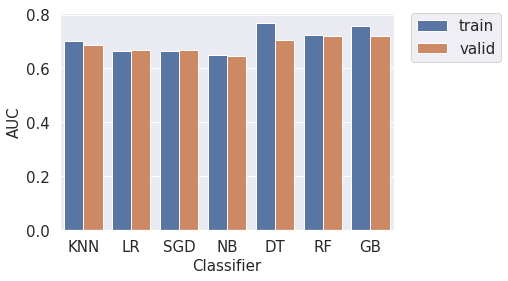

In [72]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

In [73]:
import warnings
warnings.filterwarnings('ignore')

My current best model is: Random Forest

Selecting the current best model as Random Forest Classifier as it gives AUC of 0.724 for training and 0.722 for test data. 

Picking up hyperparameter max_depth for range of values and analyzing it.

In [74]:
import time

my_params = [2,4,6,8,10]# fill this in your list of parameters

# initialize arrays for storing the results
train_metrics = np.zeros(len(my_params))
valid_metrics = np.zeros(len(my_params))

# train a model for each param in a list
t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
    for i in my_params:
    # fit model
     model= RandomForestClassifier(max_depth = i)                                
     model.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    metric_train = roc_auc_score(y_train, y_train_preds) # fill this in
    metric_valid = roc_auc_score(y_valid, y_valid_preds) # fill this in

    # save aucs
    train_metrics[jj] = metric_train
    valid_metrics[jj] = metric_valid
    
    # print the time
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

2 0.7986180782318115
4 0.7779450416564941
6 0.7911372184753418
8 0.7651150226593018
10 0.763744592666626


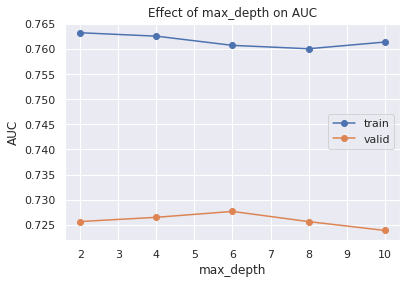

In [75]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_metrics,'o-',label = 'train')
plt.plot(my_params, valid_metrics,'o-',label = 'valid')

plt.xlabel('max_depth') # fill this in
plt.ylabel('AUC')# fill this in
plt.title('Effect of max_depth on AUC') # fill this in
plt.legend()
plt.show()

## Learning Curves

Using your baseline model that has the best performance on the validation set, plot a learning curve for that model. we will make use of the learning curve code from scikit-learn's website with a small change of plotting the AUC instead of accuracy.

In [76]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

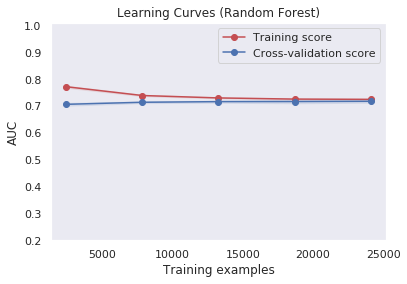

In [77]:
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.


title = "Learning Curves (Random Forest)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)                                       # fill this in
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

The above learning curve suggests that there is high bias as training and validation curves are very closer to each other. Hence, it is the case of underfitting. We can do listed below techniques to overcome high bias
High Bias:
- Add new features
- Increase model complexity
- Reduce regularization
- Change model architecture 

## Feature Importance

Plot the feature importance for random forest model.

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [79]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
num_days,0.617089
week,0.108585
month,0.097260
Age,0.083457
SMS_received,0.056326


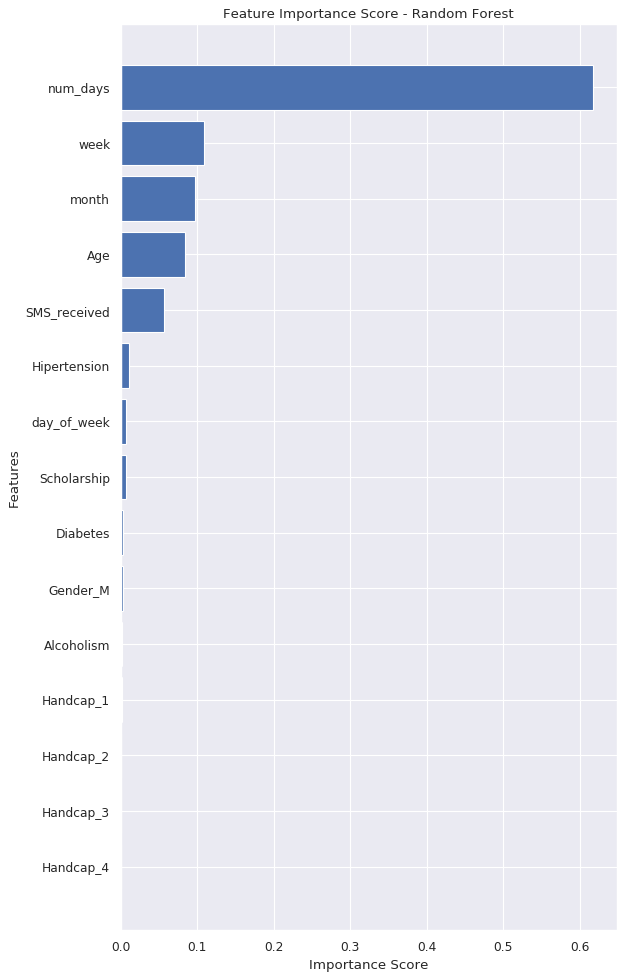

In [80]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

Looking at the above graph, we can notice that the most important feature is num_days which we have created to know the number of days between the appointment day and the scheduled day. Similarly, week, in particular, month and age seem to be more important features. Seeing the important features it conveys that features like Handicap, Alcoholic, Gender don't have much of impact on the modelling.

## Hyperparameter tuning

Using RandomizedSearchCV, optimize a few of your baseline models. 
Note that GradientBoosting Classifier may take a while so you might need to adjust the number of iterations or specific parameters. If this takes too long on your computer, feel free to take that one out. 
    
    
Random Forest Optimaization

In [81]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [82]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


To use the RandomizedSearchCV function, we need something to score or evaluate a set of hyperparameters. Here we will use the auc

In [83]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [84]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

Three important parameters of `RandomizedSearchCV` are
- scoring = evaluation metric used to pick the best model
- n_iter = number of different combinations
- cv = number of cross-validation splits

increasing the last two of these will increase the run-time, but will decrease chance of overfitting. Note that the number of variables and grid size also influences the runtime. Cross-validation is a technique for splitting the data multiple times to get a better estimate of the performance metric. For the purposes of this tutorial, we will restrict to 2 CV to reduce the time

In [85]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.1min finished


314.6388592720032


See the best parameters

In [86]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini'}

Let's analyze the performance of the best model compared to the baseline model.

In [87]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.724
Validation AUC:0.722
Optimized Random Forest
Training AUC:0.743
Validation AUC:0.727


Note that in this case, we do get a boost of 0.07 on the Validation AUC. It looks like this Optimized Random Forest has some underfitting. Let's try some other models like SGD and Gradient Boosting.

Optimization SGDClassifier

In [88]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

83.63899493217468


In [90]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 400, 'alpha': 0.01}

In [91]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.666
Validation AUC:0.670
Optimized sgdc
Training AUC:0.666
Validation AUC:0.669


Note that in this case, we donot get a boost on the Validation AUC. 
It looks like this Optimized Random Forest was better. Let's try another model, Gradient Boosting.

Optimize Gradient Boosting Tree Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [93]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

43.947837114334106


In [94]:
gbc_random.best_params_

{'n_estimators': 150, 'max_depth': 1, 'learning_rate': 0.1}

In [95]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.758
Validation AUC:0.722
Optimized gbc
Training AUC:0.722
Validation AUC:0.727


Make a plot comparing the performance of the optimized models to the baseline models. 

In [96]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [97]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.670283
1,SGD,optimized,0.668826
2,RF,baseline,0.722263
3,RF,optimized,0.727031
4,GB,baseline,0.721689
5,GB,optimized,0.727443


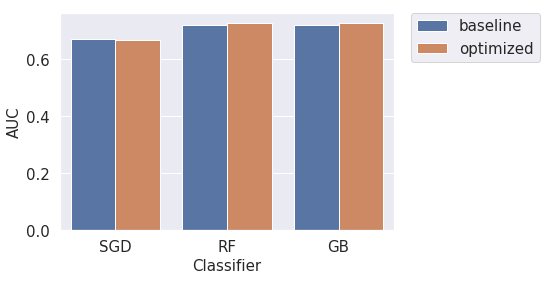

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Pick your best model

It seems both the models(Random Forest and Gradient BoostingClassifier) performed almost equal but RF Classifier has an edge in validation AUC over GB Classsifier. My best model pick is Random Forest, let's save the model using the package pickle.

In [99]:
pickle.dump(rf_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

Now we are going to evaluate the performance of the best model on our test set. Note that to execute the code below. We need to execute the cells for the functions we defined above calc_prevalence, fill_my_missing, calc_specificity,print_report

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

In [101]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [102]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

Calculate prediction probabilities

In [103]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

Evaluate the Performance

In [104]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.743
accuracy:0.684
recall:0.811
precision:0.647
specificity:0.558
prevalence:0.500
 
Validation:
AUC:0.727
accuracy:0.603
recall:0.802
precision:0.316
specificity:0.551
prevalence:0.206
 
Test:
AUC:0.710
accuracy:0.586
recall:0.790
precision:0.305
specificity:0.533
prevalence:0.206
 


Plot the ROC curve

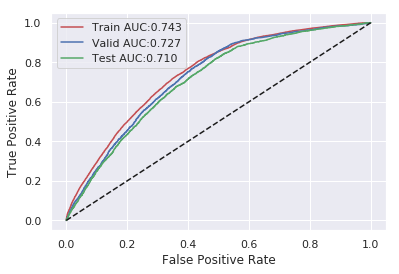

In [105]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

After analyzing all the models, we selected Random forest as our best model and optimized it. It predicted 80% of the no-show appointments correctly.
Model correctly identified that 30% of the time patients will not show up for appointment. It is 1.5 times better than randomly guessing.
People who do not show up for the appointment beacuse of several factors like long waiting period for appointment day, confirmation of SMS, Age factor. If more features are provided like longitude and lattitude, alogrithm have given more better result. 